In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from maps.plotter import Plotter
from maps.density import LineObject
from maps.density import intervals
import matplotlib
from matplotlib import rc

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

maps/plotter/Plotter.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/bay001/anaconda2/envs/brian/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/bay001/anaconda2/envs/brian/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel/kernelapp.py"

In [2]:
input_dir = 'inputs/'
output_dir = 'outputs/'

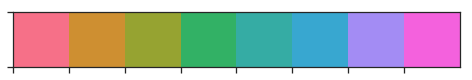

In [3]:
COLORS = sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

# 1 and 2 is code for bg subtract and entropy, respectively.
INC_0 = COLORS[6]
EXC_0 = COLORS[7]
INC_1 = COLORS[3]
EXC_1 = COLORS[5]
INC_2 = COLORS[3]
EXC_2 = COLORS[5]
BG = 'black'

In [4]:
def read_matrix(fn):
    """ Reads a normalized matrix file. Returns dataframe """
    return pd.read_table(
        fn,
        sep=',',
        index_col=0
    )

# read in sampled background values for included/excluded
- Then, join each incl/excl file together and take the min/max between the two

In [5]:
def merge_inclexcl_bg(input_dir, incl_samp, excl_samp, merged_output):
    sampled_header = [ "position","real data","significant","real native se","0.005%","mean","0.995%"]

    incl_samp_df = pd.read_table(
        os.path.join(
            input_dir, 
            incl_samp
        ),
        names=sampled_header,
        index_col=0
    )
    excl_samp_df = pd.read_table(
        os.path.join(
            input_dir, 
            excl_samp
        ),
        names=sampled_header,
        index_col=0
    )

    merged = pd.merge(incl_samp_df, excl_samp_df, how='outer', left_index=True, right_index=True)
    merged.columns = [c.replace('_x','_incl').replace('_y','_excl') for c in merged.columns]


    def _min(row):
        return min(
            row['0.005%_incl'],
            row['0.005%_excl'],
        )
    def _max(row):
        return max(
            row['0.995%_incl'],
            row['0.995%_excl'],
        )

    merged['min'] = merged.apply(_min, axis=1)
    merged['max'] = merged.apply(_max, axis=1)


    merged.to_csv(
        merged_output,
        sep='\t'
    )

In [6]:
# RBFOX2
incl_samp = '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.included.txt.parsed_0.005.txt'

excl_samp = '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.excluded.txt.parsed_0.005.txt'
merged_output = os.path.join(
    input_dir,
    '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)

merge_inclexcl_bg(input_dir=input_dir, incl_samp=incl_samp, excl_samp=excl_samp, merged_output=merged_output)

# PTBP1
incl_samp = '696_01_PTBP1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.included.txt.parsed_0.005.txt'

excl_samp = '696_01_PTBP1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.excluded.txt.parsed_0.005.txt'
merged_output = os.path.join(
    input_dir,
    '696_01_PTBP1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)
merge_inclexcl_bg(input_dir=input_dir, incl_samp=incl_samp, excl_samp=excl_samp, merged_output=merged_output)

# sRSF1
incl_samp = '301_01_SRSF1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.included.txt.parsed_0.005.txt'

excl_samp = '301_01_SRSF1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.excluded.txt.parsed_0.005.txt'
merged_output = os.path.join(
    input_dir,
    '301_01_SRSF1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)
merge_inclexcl_bg(input_dir=input_dir, incl_samp=incl_samp, excl_samp=excl_samp, merged_output=merged_output)

# HNRNPL
incl_samp = '678_01_HNRNPL.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.included.txt.parsed_0.005.txt'

excl_samp = '678_01_HNRNPL.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.excluded.txt.parsed_0.005.txt'
merged_output = os.path.join(
    input_dir,
    '678_01_HNRNPL.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)
merge_inclexcl_bg(input_dir=input_dir, incl_samp=incl_samp, excl_samp=excl_samp, merged_output=merged_output)

In [7]:
class DensityLineWithNewErrorBars(LineObject.DensityLine):
    def __init__(
        self, event_matrix, annotation_src_file, conf,
        color, min_event_threshold, num_events, label,
        bg_stderr=None
    ):
        LineObject.DensityLine.__init__(
            self, event_matrix, annotation_src_file, conf,
            color, min_event_threshold, num_events, label
        )
        if bg_stderr is not None:
            print("New object that calculates different error bars")
            self.error_pos, self.error_neg, self.max, self.min = self._get_std_error_boundaries(bg_stderr=bg_stderr)
        
    
    def _get_std_error_boundaries(self, bg_stderr=None):
        """ remove error boundaries for pos and neg """
        if bg_stderr is not None:
            bg_df = pd.read_table(bg_stderr)
            pos = bg_df['max']
            neg = bg_df['min']

            return pos, neg, max(pos)*1.10, min(neg)*1.10
        else:  # don't return error boundaries, or make sure the boundaries are the same
            return [0]*len(self.means), [0]*len(self.means), max(self.means)*1.10, min(self.means)*1.10
        
def create_line(df, color, label, min_event_threshold=100, bg_stderr=None):
    """ Users LineOject() to create a LineObject for each event matrix. """
    return DensityLineWithNewErrorBars(
        event_matrix=df, 
        annotation_src_file=label, 
        conf=0.95, 
        color=color, 
        min_event_threshold=min_event_threshold, 
        num_events=[df.shape[0]]*df.shape[1], # list of event numbers per position (doesn't really matter to us)
        label=label,
        bg_stderr=bg_stderr
    )

In [8]:
incl = read_matrix(
    os.path.join(
        input_dir, 
        '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2.set26-included-upon-knockdown.normed_matrix.txt'
    )
)
excl = read_matrix(
    os.path.join(
        input_dir, 
        '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2.set26-excluded-upon-knockdown.normed_matrix.txt'
    )
)
bg = read_matrix(
    os.path.join(
        input_dir, 
        '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt'
    )
)
bg_stderr = os.path.join(
    input_dir,
    '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)
output_file = os.path.join(output_dir, '204_01_RBFOX2.merged.r2.1.new_map.svg')

In [9]:
def plot_new_map(incl, excl, bg, merged_bg_stderr, output_file):
    incl_line = create_line(incl, INC_1, label='Incl/KD (Subtract)')
    excl_line = create_line(excl, EXC_1, label='Excl/KD (Subtract)')
    bg_line = create_line(bg, BG, label='Native cassettes (Subtract)', bg_stderr=merged_bg_stderr)

    incl_line.label = 'Incl/KD'
    excl_line.label = 'Excl/KD'
    bg_line.label = 'Native cassettes'

    Plotter.plot_se(lines=[incl_line, excl_line, bg_line], output_filename=None, map_type='density')
    plt.savefig(output_file)

Incl/KD (Subtract)
number of events (avg for all positions) found for Incl/KD (Subtract): 113
Excl/KD (Subtract)
number of events (avg for all positions) found for Excl/KD (Subtract): 138
Native cassettes (Subtract)
number of events (avg for all positions) found for Native cassettes (Subtract): 1805
New object that calculates different error bars


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=18.2. Returning /home/bay001/anaconda2/envs/phenographCluster/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf
  UserWarning)
/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=20.02. Returning /home/bay001/anaconda2/envs/phenographCluster/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf
  UserWarning)


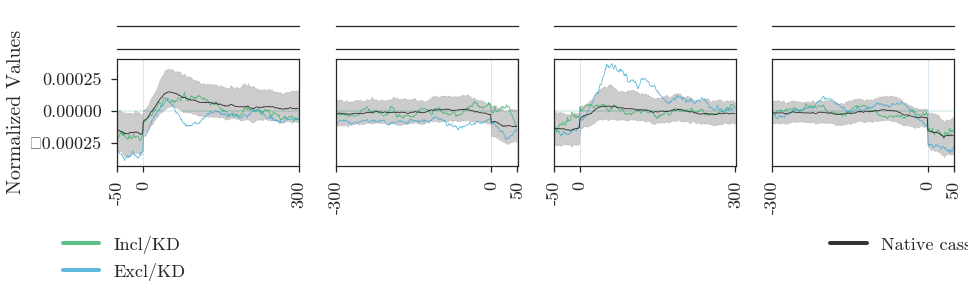

In [10]:
plot_new_map(incl, excl, bg, bg_stderr, output_file)

Incl/KD (Subtract)
number of events (avg for all positions) found for Incl/KD (Subtract): 767
Excl/KD (Subtract)
number of events (avg for all positions) found for Excl/KD (Subtract): 991
Native cassettes (Subtract)
number of events (avg for all positions) found for Native cassettes (Subtract): 1805
New object that calculates different error bars


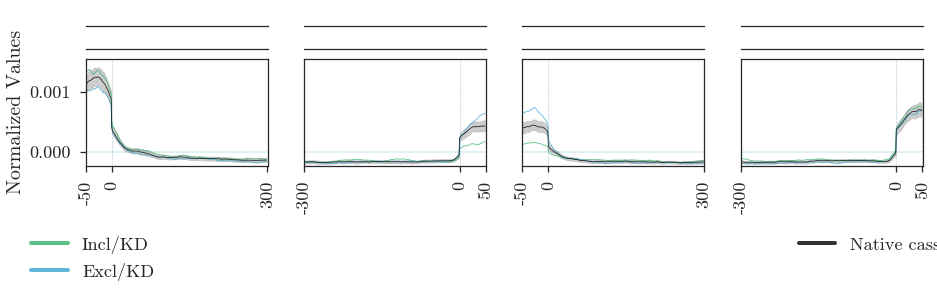

In [11]:
incl = read_matrix(
    os.path.join(
        input_dir, 
        '301_01_SRSF1.merged.r2.1.SRSF1-BGHLV12-HepG2.set12-included-upon-knockdown.normed_matrix.txt'
    )
)
excl = read_matrix(
    os.path.join(
        input_dir, 
        '301_01_SRSF1.merged.r2.1.SRSF1-BGHLV12-HepG2.set12-excluded-upon-knockdown.normed_matrix.txt'
    )
)
bg = read_matrix(
    os.path.join(
        input_dir, 
        '301_01_SRSF1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt'
    )
)
bg_stderr = os.path.join(
    input_dir,
    '301_01_SRSF1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)

output_file = os.path.join(output_dir, '301_01_SRSF1.merged.r2.1.new_map.svg')
plot_new_map(incl, excl, bg, bg_stderr, output_file)

Incl/KD (Subtract)
number of events (avg for all positions) found for Incl/KD (Subtract): 348
Excl/KD (Subtract)
number of events (avg for all positions) found for Excl/KD (Subtract): 176
Native cassettes (Subtract)
number of events (avg for all positions) found for Native cassettes (Subtract): 1805
New object that calculates different error bars


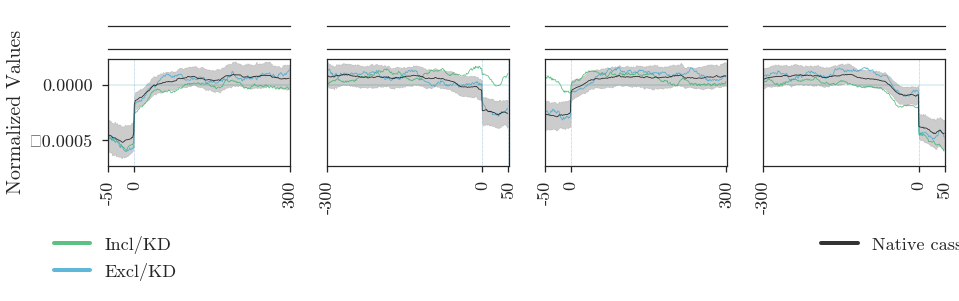

In [12]:
incl = read_matrix(
    os.path.join(
        input_dir, 
        '678_01_HNRNPL.merged.r2.1.HNRNPL-BGHLV23-HepG2.set23-included-upon-knockdown.normed_matrix.txt'
    )
)
excl = read_matrix(
    os.path.join(
        input_dir, 
        '678_01_HNRNPL.merged.r2.1.HNRNPL-BGHLV23-HepG2.set23-excluded-upon-knockdown.normed_matrix.txt'
    )
)
bg = read_matrix(
    os.path.join(
        input_dir, 
        '678_01_HNRNPL.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt'
    )
)
bg_stderr = os.path.join(
    input_dir,
    '678_01_HNRNPL.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)

output_file = os.path.join(output_dir, '678_01_HNRNPL.merged.r2.1.new_map.svg')
plot_new_map(incl, excl, bg, bg_stderr, output_file)

Incl/KD (Subtract)
number of events (avg for all positions) found for Incl/KD (Subtract): 426
Excl/KD (Subtract)
number of events (avg for all positions) found for Excl/KD (Subtract): 250
Native cassettes (Subtract)
number of events (avg for all positions) found for Native cassettes (Subtract): 1805
New object that calculates different error bars


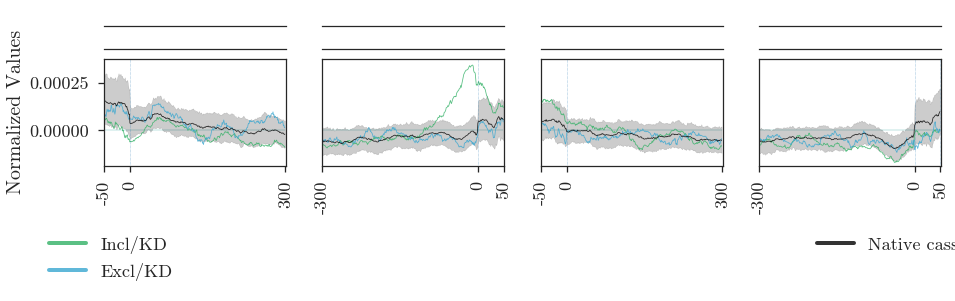

In [13]:
incl = read_matrix(
    os.path.join(
        input_dir, 
        '696_01_PTBP1.merged.r2.1.PTBP1-BGHLV12-HepG2.set12-included-upon-knockdown.normed_matrix.txt'
    )
)
excl = read_matrix(
    os.path.join(
        input_dir, 
        '696_01_PTBP1.merged.r2.1.PTBP1-BGHLV12-HepG2.set12-excluded-upon-knockdown.normed_matrix.txt'
    )
)
bg = read_matrix(
    os.path.join(
        input_dir, 
        '696_01_PTBP1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt'
    )
)
bg_stderr = os.path.join(
    input_dir,
    '696_01_PTBP1.merged.r2.1.HepG2_native_cassette_exons_all.normed_matrix.txt.sampled_means.inclexcl.txt.parsed_0.005.txt'
)

output_file = os.path.join(output_dir, '696_01_PTBP1.merged.r2.1.new_map.svg')
plot_new_map(incl, excl, bg, bg_stderr, output_file)